In [1]:
from clarifai.rest import ClarifaiApp
API_KEY = "ebd06cff13e44f708b13a9df29c6591b"
MODEL_ID = "d16f390eb32cad478c7ae150069bd2c6"

In [2]:
app = ClarifaiApp(api_key=API_KEY)

In [3]:
model = app.models.get(model_id=MODEL_ID)

In [31]:
response = model.predict_by_filename('coffee.jpg')

In [32]:
response

{'status': {'code': 10000,
  'description': 'Ok',
  'req_id': '552ec583b3b44185a6bc0d3aaac48dbc'},
 'outputs': [{'id': 'b57b0b5f4c194405b86d72858275c88c',
   'status': {'code': 10000, 'description': 'Ok'},
   'created_at': '2019-12-03T13:34:45.798681131Z',
   'model': {'id': 'd16f390eb32cad478c7ae150069bd2c6',
    'name': 'moderation',
    'created_at': '2017-05-16T19:20:38.733764Z',
    'app_id': 'main',
    'output_info': {'message': 'Show output_info with: GET /models/{model_id}/output_info',
     'type': 'concept',
     'type_ext': 'concept'},
    'model_version': {'id': 'aa8be956dbaa4b7a858826a84253cab9',
     'created_at': '2017-10-31T16:30:31.226185Z',
     'status': {'code': 21100, 'description': 'Model is trained and ready'}},
    'display_name': 'Moderation'},
   'input': {'id': '1b12ee475407442a9a218a1329cfcce4',
    'data': {'image': {'url': 'https://s3.amazonaws.com/clarifai-api/img3/prod/orig/f54a0cf1bdea45d1861277af0284558e/35fae8e2aef95e7560383ef8afd9ae39',
      'base6

In [48]:
import numpy
def image_to_predictions(image_path):
    response = model.predict_by_filename(image_path)
    concepts = response['outputs'][0]['data']['concepts']
    scores_dict = {}
    for concept in concepts:
        scores_dict[concept['name']] = concept['value']
    final_dict = [scores_dict['safe'], scores_dict['suggestive'],scores_dict['explicit'],scores_dict['drug'],scores_dict['gore']]
    return np.asarray(final_dict)

In [49]:
image_to_predictions('coffee.jpg')

array([9.93423104e-01, 4.29208029e-07, 4.42341417e-08, 6.57642493e-03,
       7.01580838e-09])

In [4]:
IMAGE_PATH = "coffee.jpg"

Populating the interactive namespace from numpy and matplotlib


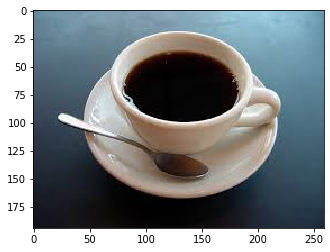

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(IMAGE_PATH)
imgplot = plt.imshow(img)
plt.show()

In [4]:
import cv2
im = cv2.imread(IMAGE_PATH)

In [5]:
cv2.imshow('ImageWindow', im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
im.shape

(194, 259, 3)

In [7]:
im2 = cv2.resize(im,(50,50))

In [8]:
im2.shape

(50, 50, 3)

In [9]:
current_image = im2.astype(np.float32) / 255

In [10]:
current_image

array([[[0.5882353 , 0.5137255 , 0.3764706 ],
        [0.6156863 , 0.5411765 , 0.40392157],
        [0.63529414, 0.56078434, 0.42352942],
        ...,
        [0.7647059 , 0.6784314 , 0.49803922],
        [0.7294118 , 0.6392157 , 0.45882353],
        [0.6901961 , 0.59607846, 0.41568628]],

       [[0.59607846, 0.5254902 , 0.39215687],
        [0.62352943, 0.54901963, 0.41960785],
        [0.6313726 , 0.5568628 , 0.42745098],
        ...,
        [0.7529412 , 0.6627451 , 0.48235294],
        [0.72156864, 0.6313726 , 0.4509804 ],
        [0.6666667 , 0.57254905, 0.39215687]],

       [[0.57254905, 0.49411765, 0.37254903],
        [0.5882353 , 0.50980395, 0.3882353 ],
        [0.60784316, 0.5294118 , 0.40784314],
        ...,
        [0.7411765 , 0.6509804 , 0.47058824],
        [0.7254902 , 0.63529414, 0.45490196],
        [0.68235296, 0.5882353 , 0.40784314]],

       ...,

       [[0.10588235, 0.07450981, 0.07450981],
        [0.10980392, 0.07843138, 0.07843138],
        [0.10588235, 0

In [11]:
cv2.imshow('ImageWindow', current_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'current_image' is not defined

In [83]:
def pick_random_coordinate():
    return np.random.choice(coordinates, 1)[0]

In [84]:
def plus_h_image(current_image, coordinate):
    plus_image = current_image.copy()
    plus_image[coordinate_numbering_rev[coordinate]] = plus_image[coordinate_numbering_rev[coordinate]]+h
    return plus_image

In [4]:
def save_image(image, path):
    cv2.imwrite(path, image)

In [2]:
def is_better(goal_coordinate, before_score, after_score):
    """Goal is to minimize the value of goal_coordinate."""
    return after_score[goal_coordinate] < before_score[goal_coordinate]

In [60]:
def estimate_gradient(current_image, coordinate):
    plus_image = plus_h_image(current_image, coordinate)
    save_image(plus_image,"plus_image.jpg")
    plus_prediction = image_to_predictions("plus_image.jpg")
    save_image(current_image, "current_image.jpg")
    current_score = image_to_predictions(current_image*255)
    print("Current score:")
    print(current_score)
    grad = (plus_prediction-current_score)/(h)
    return grad

In [1]:
def image_to_predictions(image_path):
    response = model.predict_by_filename(image_path)
    concepts = response['outputs'][0]['data']['concepts']
    scores_dict = {}
    for concept in concepts:
        scores_dict[concept['name']] = concept['value']
    final_dict = [scores_dict['safe'], scores_dict['suggestive'],scores_dict['explicit'],scores_dict['drug'],scores_dict['gore']]
    return np.asarray(final_dict)

In [1]:
from clarifai.rest import ClarifaiApp
API_KEY = "ebd06cff13e44f708b13a9df29c6591b"
MODEL_ID = "d16f390eb32cad478c7ae150069bd2c6"
app = ClarifaiApp(api_key=API_KEY)
model = app.models.get(model_id=MODEL_ID)

In [11]:
import cv2
import numpy as np
IMAGE_PATH = "coffee.jpg"
im = cv2.imread(IMAGE_PATH)
im2 = cv2.resize(im,(50,50))
im3 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
current_image = im3.astype(np.float32) / 255

In [15]:
def image_to_predictions(image_path):
    response = model.predict_by_filename(image_path)
    concepts = response['outputs'][0]['data']['concepts']
    scores_dict = {}
    for concept in concepts:
        scores_dict[concept['name']] = concept['value']
    final_dict = [scores_dict['safe'], scores_dict['suggestive'],scores_dict['explicit'],scores_dict['drug'],scores_dict['gore']]
    return np.asarray(final_dict)

In [16]:
def save_image(image, path):
    cv2.imwrite(path, image)

In [17]:
def plus_h_image(current_image, coordinate):
    plus_image = current_image.copy()
    plus_image[coordinate_numbering_rev[coordinate]] = plus_image[coordinate_numbering_rev[coordinate]]+h
    return plus_image

In [18]:
def pick_random_coordinate():
    return np.random.choice(coordinates, 1)[0]

In [19]:
def is_better(goal_coordinate, delta):
    """Goal is to minimize the value of goal_coordinate."""
    return delta[goal_coordinate] < 0

In [20]:
coordinate_numbering = {}
coordinate_numbering_rev = {}
index = 0
for i in range(current_image.shape[1]):
    for j in range(current_image.shape[0]):
            coordinate_numbering[tuple((i,j))]=index
            coordinate_numbering_rev[index]=tuple((i,j))
            index+=1
coordinates = list(coordinate_numbering.values())

In [21]:
GOAL_COORDINATE = 0
NUM_ITERS = 10
LEARNING_RATE = 0.01
h = 0.005
for i in range(NUM_ITERS):
    image_save_path = "current_image"+str(i)+".jpg"
    save_image(current_image*255, image_save_path)
    current_score = image_to_predictions(image_save_path)
    print("Iteration "+str(i)+" score:")
    print(current_score)
    chosen_coordinate = pick_random_coordinate()
    plus_image = plus_h_image(current_image, chosen_coordinate)
    save_image(plus_image*255,"plus_image.jpg")
    plus_prediction = image_to_predictions("plus_image.jpg")
    delta = plus_prediction-current_score
    print("Iteration "+str(i)+" delta:")
    print(delta)
    if (is_better(GOAL_COORDINATE, delta)):
        current_image[coordinate_numbering_rev[chosen_coordinate]]+=LEARNING_RATE 
    else:
        current_image[coordinate_numbering_rev[chosen_coordinate]]-=LEARNING_RATE

Iteration 0 score:
[9.98826861e-01 1.91611065e-07 3.88002022e-08 1.17289473e-03
 3.01193595e-08]
Iteration 0 delta:
[ 0.00000000e+00 -1.08002496e-12 -2.45137244e-13 -1.17579475e-08
 -2.41584530e-13]
Iteration 1 score:
[9.98713017e-01 1.95503304e-07 3.92091550e-08 1.28676998e-03
 2.96463138e-08]
Iteration 1 delta:
[-3.57627869e-06  8.19316881e-09  2.09722018e-09  3.44810542e-06
  3.67004205e-10]
Iteration 2 score:
[9.98793185e-01 2.09130476e-07 3.99210975e-08 1.20653852e-03
 2.99399758e-08]
Iteration 2 delta:
[ 1.99675560e-05 -6.06115691e-09 -4.04224210e-10 -2.00306531e-05
 -5.66162228e-10]
Iteration 3 score:
[9.98811483e-01 1.90833674e-07 3.63971715e-08 1.18828763e-03
 2.87970057e-08]
Iteration 3 delta:
[-4.97698784e-05  1.41352956e-08  4.89388086e-09  4.97497385e-05
  1.95761807e-09]
Iteration 4 score:
[9.98747885e-01 2.18077091e-07 3.71979247e-08 1.25180103e-03
 2.84209403e-08]
Iteration 4 delta:
[ 2.37822533e-05 -4.11004919e-09 -3.75379727e-11 -2.37227650e-05
 -3.85337984e-10]
Itera

In [67]:
T[chosen_coordinate]+=1

In [70]:
grad = estimate_gradient(current_image, chosen_coordinate)

In [ ]:
M[chosen_coordinate]=beta1*M[chosen_coordinate]+(1-beta1)*grad

In [18]:
plus_image = plus_h_image(current_image, 6933)

In [23]:
bla = plus_image*255

In [27]:
bla[coordinate_numbering_rev[6933]]

13.0255

In [36]:
cv2.imwrite("temp.jpg", current_image)

True

In [37]:
image_to_predictions("temp.jpg")

{'safe': 0.8859059810638428,
 'suggestive': 0.07141874730587006,
 'explicit': 0.03244437649846077,
 'drug': 0.009777026250958443,
 'gore': 0.0004538639332167804}

In [35]:
image_to_predictions("temp.jpg")

{'safe': 0.9999191164970398,
 'drug': 8.083345164777711e-05,
 'suggestive': 3.6634840938631896e-08,
 'gore': 1.712850483670536e-08,
 'explicit': 5.248435464011436e-09}

In [104]:
pick_random_coordinate()

6933

In [38]:
temp = {'safe': 0.8859059810638428,
 'suggestive': 0.07141874730587006,
 'explicit': 0.03244437649846077,
 'drug': 0.009777026250958443,
 'gore': 0.0004538639332167804}

In [40]:
bla

[0.8859059810638428,
 0.07141874730587006,
 0.03244437649846077,
 0.009777026250958443,
 0.0004538639332167804]

In [105]:
coordinate_numbering_rev[4780]

(31, 43, 1)

In [106]:
current_image[coordinate_numbering_rev[4780]]

0.37254903

In [107]:
current_image[coordinate_numbering_rev[4780]] = current_image[coordinate_numbering_rev[4780]]+h

In [109]:
plus_image = current_image.copy()
plus_image[coordinate_numbering_rev[4780]] = plus_image[coordinate_numbering_rev[4780]]+h

In [110]:
plus_image[coordinate_numbering_rev[4780]] = plus_image[coordinate_numbering_rev[4780]]+1

In [108]:
current_image[coordinate_numbering_rev[4780]]

0.372649

In [84]:
cv2.imshow('ImageWindow', current_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [86]:
Mat_<float> fm;
current_image.convertTo(fm,CV_32F);

NameError: name 'Mat_' is not defined

In [50]:
a=array([9.93423104e-01, 4.29208029e-07, 4.42341417e-08, 6.57642493e-03,
       7.01580838e-09])

In [53]:
b=array([9.93023104e-01, 4.29208029e-07, 4.42341417e-08, 6.57642493e-03,
       7.01580838e-09])

In [55]:
(a-b)/(2*h)

array([2., 0., 0., 0., 0.])